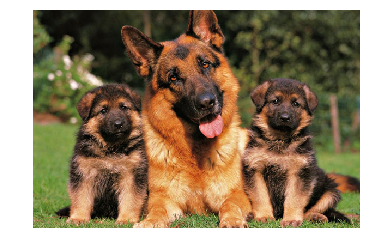

In [1]:
import skimage.io
import os
from matplotlib import pyplot as plt

file_name = '26132.jpg'
if not os.access(file_name, os.R_OK):
    file_URL = 'http://www.zooclub.ru/attach/26000/26132.jpg'
    os.system('wget ' + file_URL)

img = skimage.io.imread(file_name)
plt.imshow(img); plt.axis('off'); plt.show()

In [10]:
import torchvision

# get model
resnet_18 = torchvision.models.resnet18(pretrained=True)
resnet_18.eval();

In [6]:
# get classes
file_name = 'synset_words.txt'
if not os.access(file_name, os.W_OK):
    synset_URL = 'https://github.com/szagoruyko/functional-zoo/raw/master/synset_words.txt'
    os.system('wget ' + synset_URL)

classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ', 1)[1].split(', ', 1)[0])
classes = tuple(classes)

In [4]:
from torchvision import transforms as trn

# define image transformation
centre_crop = trn.Compose([
        trn.ToPILImage(),
        trn.Scale(256),
        trn.CenterCrop(224),
        trn.ToTensor(),
        trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [12]:
from torch.autograd import Variable as V
from torch.nn import functional as f

# get top 5 probabilities
x = V(centre_crop(img).unsqueeze(0), volatile=True)
logit = resnet_18(x)
h_x = f.softmax(logit).data.squeeze()
probs, idx = h_x.sort(0, True)
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

0.935 -> German shepherd
0.033 -> Leonberg
0.031 -> malinois
0.000 -> Norwegian elkhound
0.000 -> African hunting dog
